## *Using the Iris dataset available in the sklearn library.*

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
# Loading the dataset
iris = load_iris()
# Creating a DataFrame with the features
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Adding the target column
df['target'] = iris.target
# Displaying the rows
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


## 1. Preprocessing
#### Droping the species column since this is a clustering problem.

In [8]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
true_labels = iris.target

## 2.Clustering Algorithm Implementation

### A) KMeans Clustering
#### Checking how KMeans clustering works and KMeans clustering might be suitable for the Iris dataset.

### KMeans is a popular unsupervised machine learning algorithm used to group data into K clusters based on how similar the data points are.

#### The Iris dataset has numerical and normalized features, which makes it a good fit for KMeans.

#### We choose K = 3 because we expect there are 3 types of flowers.
#### Here's how KMeans works:

#####    . It randomly picks 3 flowers to be the starting centroids (centers of clusters).

#####    . It assigns each flower to the closest centroid, forming 3 groups.

#####    . It updates each centroid to be the average of the flowers in its group.

#####    . It repeats steps 2 and 3 until the clusters stop changing much.

### KMeans is fast and works well with this kind of data.

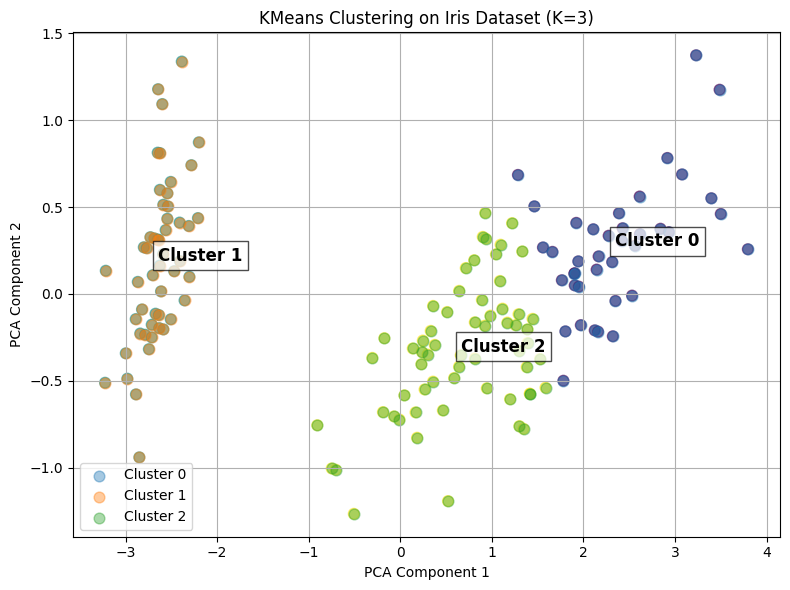

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Applying KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

# Reducing dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', s=60, alpha=0.6)

# Highlighting each cluster and add centroid labels
for cluster in np.unique(kmeans_labels):
    cluster_points = pca_result[kmeans_labels == cluster]
    centroid = cluster_points.mean(axis=0)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=60, label=f'Cluster {cluster}', alpha=0.4)
    plt.text(centroid[0], centroid[1], f'Cluster {cluster}', fontsize=12, weight='bold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Plotting settings
plt.title("KMeans Clustering on Iris Dataset (K=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
for i in range(3):
    cluster_points = df[kmeans_labels == i]
    print(f"Cluster {i} points:\n", cluster_points, "\n")

Cluster 0 points:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                 7.0               3.2                4.7               1.4
52                 6.9               3.1                4.9               1.5
77                 6.7               3.0                5.0               1.7
100                6.3               3.3                6.0               2.5
102                7.1               3.0                5.9               2.1
103                6.3               2.9                5.6               1.8
104                6.5               3.0                5.8               2.2
105                7.6               3.0                6.6               2.1
107                7.3               2.9                6.3               1.8
108                6.7               2.5                5.8               1.8
109                7.2               3.6                6.1               2.5
110                6.5               3.2     

#### To summarize the average dimensions of sepals and petals for each species of iris flower: Setosa, Versicolor, and Virginica.

In [10]:
# Creating DataFrame with features and species
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
# Computing and print the mean values by species
print(df.groupby('species').mean())

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


#### To check how many samples were correctly classified within each cluster.

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# Loading dataset and create DataFrame
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
# Applying KMeans clustering
df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(iris.data)
# Comparing predicted clusters with actual species
print(pd.crosstab(df['cluster'], df['species']))


species  setosa  versicolor  virginica
cluster                               
0             0           3         36
1            50           0          0
2             0          47         14


### Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.

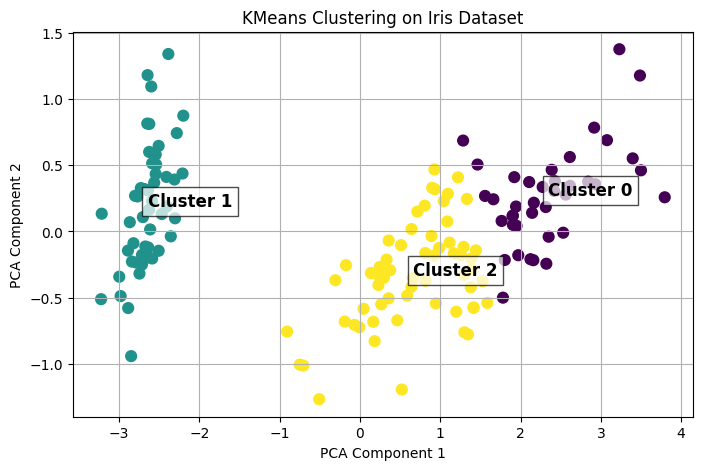

In [15]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Loading data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df)
# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[iris.feature_names])  # Use DataFrame with column names
# Transforming KMeans centroids (convert to DataFrame to preserve feature names)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=iris.feature_names)
centroids_2d = pca.transform(centroids_df)
# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis', s=60)
for i, (x, y) in enumerate(centroids_2d):
    plt.text(x, y, f'Cluster {i}', fontsize=12, weight='bold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


### B) Hierarchical Clustering
#### Description of how Hierarchical clustering works. and why Hierarchical clustering might be suitable for the Iris dataset with visualize the clusters.

#### Hierarchical clustering creates a nested grouping of data points through two main approaches:

##### .Agglomerative (bottom-up): Begin with each data point as an individual cluster and progressively merge clusters step by step.

##### .Divisive (top-down): Start with all data points in a single large cluster and recursively split it into smaller clusters.

##### Since the Iris dataset is relatively small, hierarchical clustering works well for it. This method also provides a clear visualization of how points relate to each other via a dendrogram. Unlike KMeans, hierarchical clustering doesn’t require specifying the number of clusters in advance, though you can choose the number of clusters by cutting the dendrogram at the desired level.

#### Dendrogram for Iris Dataset.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


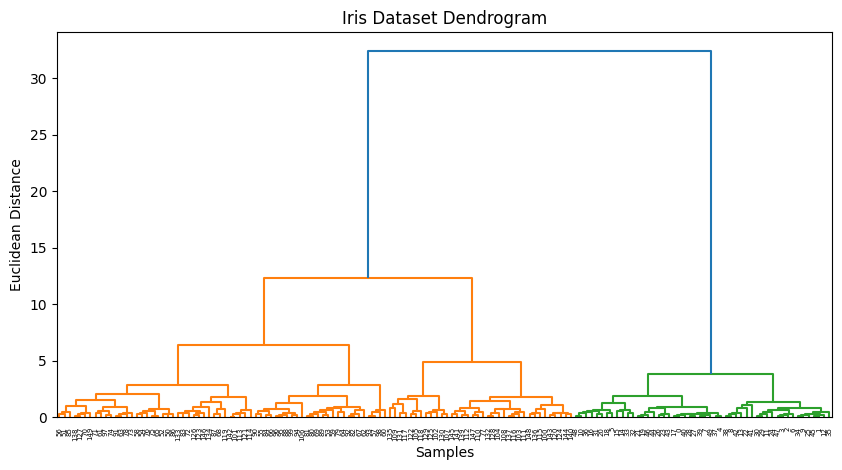

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
# Loading Iris data (features only)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())
# Performing hierarchical clustering using Ward's method
linked = linkage(df, method='ward')
# Plotting dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Iris Dataset Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()


In [28]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['cluster'] = agglo.fit_predict(df)
print(df['cluster'].value_counts())


cluster
0    64
1    50
2    36
Name: count, dtype: int64


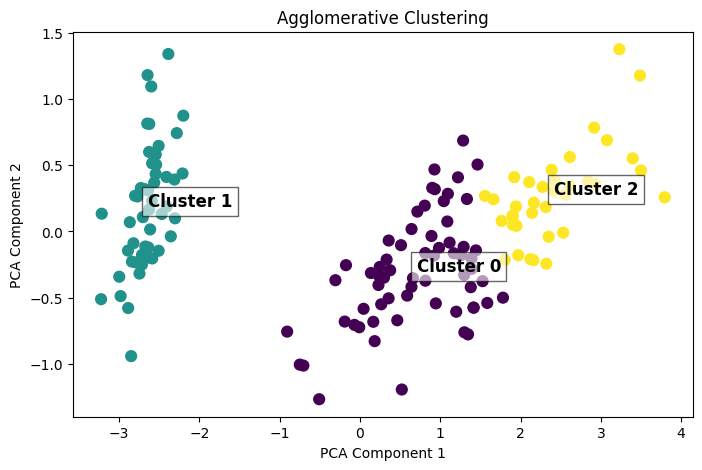

In [29]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA (exclude 'cluster' column)
pca_result = PCA(n_components=2).fit_transform(df.drop(columns='cluster'))

plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis', s=60)

for cluster in np.unique(df['cluster']):
    x = pca_result[df['cluster'] == cluster, 0].mean()
    y = pca_result[df['cluster'] == cluster, 1].mean()
    plt.text(x, y, f'Cluster {cluster}', fontsize=12, weight='bold',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

plt.title("Agglomerative Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [33]:
df['cluster'] = agglo.fit_predict(df)

for cluster in np.unique(df['cluster']):
    print(f"Cluster {cluster} points:\n", df[df['cluster'] == cluster])


Cluster 0 points:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                 7.0               3.2                4.7               1.4   
51                 6.4               3.2                4.5               1.5   
52                 6.9               3.1                4.9               1.5   
53                 5.5               2.3                4.0               1.3   
54                 6.5               2.8                4.6               1.5   
..                 ...               ...                ...               ...   
134                6.1               2.6                5.6               1.4   
138                6.0               3.0                4.8               1.8   
142                5.8               2.7                5.1               1.9   
146                6.3               2.5                5.0               1.9   
149                5.9               3.0                5.1               1.8   

     clu

##### Comparing clusters to actual species.

In [35]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
# Loading data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
# Applying clustering
df['cluster'] = AgglomerativeClustering(n_clusters=3).fit_predict(df[iris.feature_names])
# Comparing clusters with actual species
print(pd.crosstab(df['cluster'], df['species']))

species  setosa  versicolor  virginica
cluster                               
0             0          49         15
1            50           0          0
2             0           1         35


## **Final Result:**
### Agglomerative Clustering performs slightly better on the Iris dataset.

### In both clustering methods, Setosa flowers are perfectly grouped. However, the other two flower types (Versicolor and Virginica) show slight overlap between clusters.

### . KMeans correct predictions: 50 + 47 + 36 = 133 / 150 → 88.7% accuracy
### . Agglomerative Clustering correct predictions: 50 + 49 + 35 = 134 / 150 → 89.3% accuracy